# Data Analysis on Automotive dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

#Read Data

In [2]:
df=pd.read_csv('C:/Users/Nisarga/Downloads/kaggledataset/cars_engage_2022.csv')

# Taking only the columns Required for Data analysis
Columns with high cardinality and those 90% empty are not taken

In [3]:
df2=df[['Make','Model','Variant','Sales','Ex_Showroom_Price','Cylinders','Valves_Per_Cylinder','Drivetrain','Engine_Location','Fuel_Tank_Capacity','Fuel_Type','Body_Type','Doors','City_Mileage','Highway_Mileage','ARAI_Certified_Mileage','Kerb_Weight','Gears','Power_Steering','Power_Seats','Keyless_Entry','Power','Torque','Seating_Capacity','Type','12v_Power_Outlet','Boot_Space','Number_of_Airbags']]

In [4]:
df2["Car"] = df2['Make'].astype(str) +"-"+ df2["Model"]

C:\Users\Nisarga\AppData\Local\Temp/ipykernel_34856/3902776508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Car"] = df2['Make'].astype(str) +"-"+ df2["Model"]


In [5]:
df2.shape

(1276, 29)

In [6]:
#Splitting variables in numerical and objects
df2.select_dtypes(include=object).columns,df2.select_dtypes(include=np.number).columns

(Index(['Make', 'Model', 'Variant', 'Sales', 'Ex_Showroom_Price', 'Drivetrain',
        'Engine_Location', 'Fuel_Tank_Capacity', 'Fuel_Type', 'Body_Type',
        'City_Mileage', 'Highway_Mileage', 'ARAI_Certified_Mileage',
        'Kerb_Weight', 'Gears', 'Power_Steering', 'Power_Seats',
        'Keyless_Entry', 'Power', 'Torque', 'Type', '12v_Power_Outlet',
        'Boot_Space', 'Car'],
       dtype='object'),
 Index(['Cylinders', 'Valves_Per_Cylinder', 'Doors', 'Seating_Capacity',
        'Number_of_Airbags'],
       dtype='object'))

In [7]:
categorical_columns =['Make', 'Variant', 'Drivetrain',
        'Engine_Location', 'Fuel_Tank_Capacity', 'Fuel_Type', 'Body_Type',
        'Power_Steering', 'Power_Seats',
        'Keyless_Entry', 'Power', 'Torque', 'Type', '12v_Power_Outlet',
        'Boot_Space']
numerical_columns= ['Cylinders', 'Valves_Per_Cylinder','Sales', 'Ex_Showroom_Price', 'Doors', 'Seating_Capacity',
        'Number_of_Airbags', 'City_Mileage', 'Highway_Mileage', 'ARAI_Certified_Mileage',
        'Kerb_Weight', 'Gears']

# Draw histogram to check data
if skewed ,then fill null values with median
if categorical, fill with mode
else mean

array([[<AxesSubplot:title={'center':'Cylinders'}>,
        <AxesSubplot:title={'center':'Valves_Per_Cylinder'}>],
       [<AxesSubplot:title={'center':'Doors'}>,
        <AxesSubplot:title={'center':'Seating_Capacity'}>],
       [<AxesSubplot:title={'center':'Number_of_Airbags'}>,
        <AxesSubplot:>]], dtype=object)

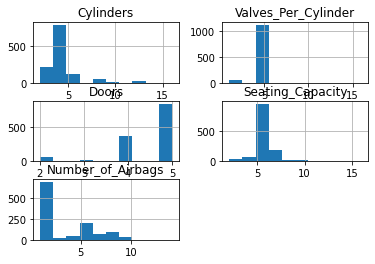

In [8]:
df2.hist()

<AxesSubplot:>

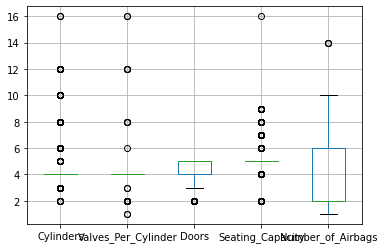

In [9]:
df2.boxplot()

# Data Cleaning

Check if there are missing values in dataframe

In [10]:
df2.isnull().sum()

Make                       75
Model                       0
Variant                     0
Sales                       0
Ex_Showroom_Price           0
Cylinders                  66
Valves_Per_Cylinder       102
Drivetrain                  7
Engine_Location            43
Fuel_Tank_Capacity         69
Fuel_Type                   0
Body_Type                   6
Doors                       4
City_Mileage              555
Highway_Mileage           800
ARAI_Certified_Mileage    114
Kerb_Weight               365
Gears                     105
Power_Steering             57
Power_Seats               893
Keyless_Entry             274
Power                       0
Torque                      2
Seating_Capacity            6
Type                        1
12v_Power_Outlet          154
Boot_Space                249
Number_of_Airbags         135
Car                         0
dtype: int64

In [11]:
df2.head()

,Make,Model,Variant,Sales,Ex_Showroom_Price,Cylinders,Valves_Per_Cylinder,Drivetrain,Engine_Location,Fuel_Tank_Capacity,...,Power_Seats,Keyless_Entry,Power,Torque,Seating_Capacity,Type,12v_Power_Outlet,Boot_Space,Number_of_Airbags,Car
0,Tata,Nano Genx,Xt,$223211.98,"Rs. 2,92,667",2.0,2.0,RWD (Rear Wheel Drive),"Rear, Transverse",24 litres,...,NaN,Remote,38PS@5500rpm,51Nm@4000rpm,4.0,Manual,Yes,110 litres,NaN,Tata-Nano Genx
1,Tata,Nano Genx,Xe,"$3,709.40","Rs. 2,36,447",2.0,2.0,RWD (Rear Wheel Drive),"Rear, Transverse",24 litres,...,NaN,NaN,38PS@5500rpm,51Nm@4000rpm,4.0,Manual,Yes,110 litres,NaN,Tata-Nano Genx
2,Tata,Nano Genx,Emax Xm,"$5,175.17","Rs. 2,96,661",2.0,2.0,RWD (Rear Wheel Drive),"Rear, Transverse",15 litres,...,NaN,NaN,38PS@5500rpm,51Nm@4000rpm,4.0,Manual,Yes,110 litres,NaN,Tata-Nano Genx
3,Tata,Nano Genx,Xta,"$2,892.51","Rs. 3,34,768",2.0,2.0,RWD (Rear Wheel Drive),"Rear, Transverse",24 litres,...,NaN,Remote,38PS@5500rpm,51Nm@4000rpm,4.0,Automatic,Yes,94 litres,NaN,Tata-Nano Genx
4,Tata,Nano Genx,Xm,"$2,832.96","Rs. 2,72,223",2.0,2.0,RWD (Rear Wheel Drive),"Rear, Transverse",24 litres,...,NaN,NaN,38PS@5500rpm,51Nm@4000rpm,4.0,Manual,Yes,110 litres,NaN,Tata-Nano Genx


# Data Imputation and Manipulation

Fill the null values with appropriate values using aggregate functions  such as mean median and mode
categorical value-mode
numerical value-median here cuz right skewed data

In [12]:
#define a function impute_median
def impute_median(series):
    return series.fillna(series.median().astype(int))

In [13]:
#define a function impute_mean
def impute_mean(series):
    return series.fillna(series.mean().astype(int))

#define a function impute_mode
def impute_mode(series):
    return series.fillna(series.mode().astype(str))

array([[<AxesSubplot:title={'center':'Cylinders'}>,
        <AxesSubplot:title={'center':'Valves_Per_Cylinder'}>]],
      dtype=object)

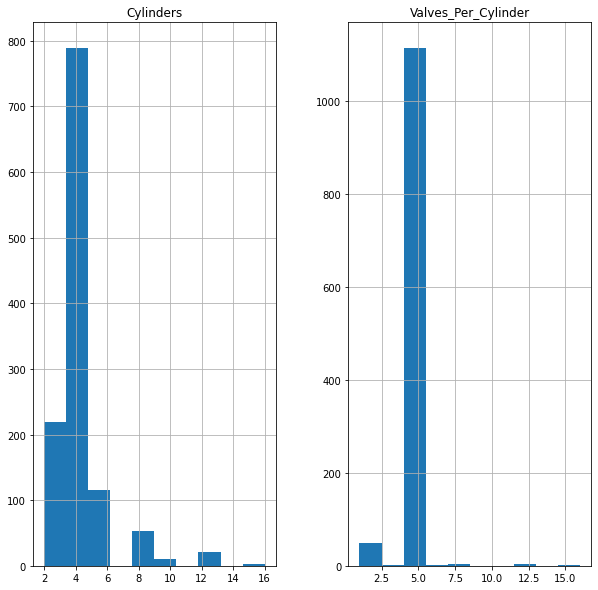

In [14]:
df2.hist(column=["Cylinders","Valves_Per_Cylinder"],figsize=(10,10))

In [15]:
df2.Cylinders=df2['Cylinders'].transform(impute_median)
df2.Valves_Per_Cylinder=df2['Valves_Per_Cylinder'].transform(impute_median)    

C:\Users\Nisarga\AppData\Local\Temp/ipykernel_34856/583975158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Cylinders=df2['Cylinders'].transform(impute_median)
C:\Users\Nisarga\AppData\Local\Temp/ipykernel_34856/583975158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Valves_Per_Cylinder=df2['Valves_Per_Cylinder'].transform(impute_median)


In [16]:
df2.Cylinders.isnull().sum()
#working fine-confirmed
#now i will fill all other required columns with mean or median in the same cell

0

array([[<AxesSubplot:title={'center':'Cylinders'}>,
        <AxesSubplot:title={'center':'Valves_Per_Cylinder'}>],
       [<AxesSubplot:title={'center':'Doors'}>, <AxesSubplot:>]],
      dtype=object)

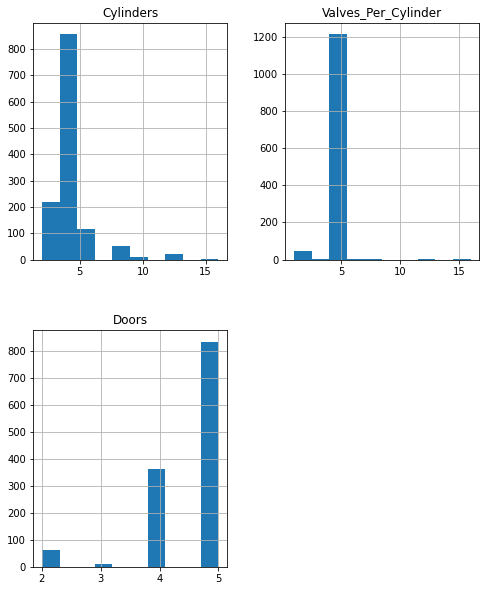

In [17]:
df2.hist(column=["Cylinders","Valves_Per_Cylinder",'Doors'],figsize=(8,10))

In [18]:
df2.Doors=df2['Doors'].transform(impute_median)

C:\Users\Nisarga\AppData\Local\Temp/ipykernel_34856/1436557068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Doors=df2['Doors'].transform(impute_median)


In [19]:
df2.Doors.isnull().sum()

0

In [20]:
df['Ex_Showroom_Price'] = df['Ex_Showroom_Price'].str.replace('Rs. ','',regex=False)
df['Ex_Showroom_Price'] = df['Ex_Showroom_Price'].str.replace(',','',regex=False)
df['Ex_Showroom_Price'] = df['Ex_Showroom_Price'].astype(int)

In [21]:
df.Ex_Showroom_Price

0        292667
1        236447
2        296661
3        334768
4        272223
         ...   
1271    1302000
1272    1421000
1273    1431000
1274    1201000
1275    6862560
Name: Ex_Showroom_Price, Length: 1276, dtype: int32

In [22]:
df['Sales'] = df['Sales'].str.replace('$','',regex=False)
df['Sales'] = df['Sales'].str.replace('.','',regex=False)
df['Sales'] = df['Sales'].str.replace(',','',regex=False)
df['Sales'] = df['Sales'].astype(float)

In [23]:
df.Sales

0        22321198.0
1          370940.0
2          517517.0
3          289251.0
4          283296.0
           ...     
1271        14995.0
1272     76515708.0
1273     37152368.0
1274    706523147.0
1275    466523704.0
Name: Sales, Length: 1276, dtype: float64

In [24]:
df2[ 'Kerb_Weight'] =df2['Kerb_Weight'].apply(lambda x: str(x).replace('kg', '') if 'kg' in str(x) else str(x))
df2[ 'Kerb_Weight'] =df2['Kerb_Weight'].apply(lambda x: str(x).replace('1016-1043', '1030') if '1016-1043' in str(x) else str(x))
df2[ 'Kerb_Weight'] =df2['Kerb_Weight'].apply(lambda x: str(x).replace('1053-1080', '1066') if '1053-1080' in str(x) else str(x))
df2[ 'Kerb_Weight']=pd.to_numeric(df2[ 'Kerb_Weight'], errors='coerce')

C:\Users\Nisarga\AppData\Local\Temp/ipykernel_34856/1813577808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[ 'Kerb_Weight'] =df2['Kerb_Weight'].apply(lambda x: str(x).replace('kg', '') if 'kg' in str(x) else str(x))
C:\Users\Nisarga\AppData\Local\Temp/ipykernel_34856/1813577808.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[ 'Kerb_Weight'] =df2['Kerb_Weight'].apply(lambda x: str(x).replace('1016-1043', '1030') if '1016-1043' in str(x) else str(x))
C:\Users\Nisarga\AppData\Local\Temp/ipyk

In [25]:
df2.Kerb_Weight

0        660.0
1        725.0
2        710.0
3        725.0
4        725.0
         ...  
1271    1170.0
1272    1175.0
1273    1107.0
1274    1080.0
1275    2335.0
Name: Kerb_Weight, Length: 1276, dtype: float64

In [26]:
df2[ 'Fuel_Tank_Capacity'] =df2[ 'Fuel_Tank_Capacity'].apply(lambda x: str(x).replace('litres', '') if 'litres' in str(x) else str(x))
df2[ 'City_Mileage'] =df2[ 'City_Mileage'].apply(lambda x: str(x).replace('?', '') if '?' in str(x) else str(x))
df2[ 'City_Mileage'] =df2[ 'City_Mileage'].apply(lambda x: str(x).replace('km/litre', '') if 'km/litre' in str(x) else str(x))
df2[ 'Highway_Mileage'] =df2[ 'Highway_Mileage'].apply(lambda x: str(x).replace('km/litre', '') if 'km/litre' in str(x) else str(x))

C:\Users\Nisarga\AppData\Local\Temp/ipykernel_34856/3203822481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[ 'Fuel_Tank_Capacity'] =df2[ 'Fuel_Tank_Capacity'].apply(lambda x: str(x).replace('litres', '') if 'litres' in str(x) else str(x))
C:\Users\Nisarga\AppData\Local\Temp/ipykernel_34856/3203822481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[ 'City_Mileage'] =df2[ 'City_Mileage'].apply(lambda x: str(x).replace('?', '') if '?' in str(x) else str(x))
C:\Users\Nisarga\AppData\Local\Tem

In [28]:
df2[ 'Fuel_Tank_Capacity']=pd.to_numeric(df2[ 'Fuel_Tank_Capacity'], errors='coerce')
df2[ 'City_Mileage']=pd.to_numeric(df2[ 'City_Mileage'], errors='coerce')
df2[ 'Highway_Mileage']=pd.to_numeric(df2[ 'Highway_Mileage'], errors='coerce')

C:\Users\Nisarga\AppData\Local\Temp/ipykernel_34856/2101690497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[ 'Fuel_Tank_Capacity']=pd.to_numeric(df2[ 'Fuel_Tank_Capacity'], errors='coerce')
C:\Users\Nisarga\AppData\Local\Temp/ipykernel_34856/2101690497.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[ 'City_Mileage']=pd.to_numeric(df2[ 'City_Mileage'], errors='coerce')
C:\Users\Nisarga\AppData\Local\Temp/ipykernel_34856/2101690497.py:3: SettingWithCopyWarning: 
A value is trying to be set 

In [29]:
df2.isnull().sum()

Make                       75
Model                       0
Variant                     0
Sales                       0
Ex_Showroom_Price           0
Cylinders                   0
Valves_Per_Cylinder         0
Drivetrain                  7
Engine_Location            43
Fuel_Tank_Capacity         69
Fuel_Type                   0
Body_Type                   6
Doors                       0
City_Mileage              589
Highway_Mileage           801
ARAI_Certified_Mileage    114
Kerb_Weight               365
Gears                     105
Power_Steering             57
Power_Seats               893
Keyless_Entry             274
Power                       0
Torque                      2
Seating_Capacity            6
Type                        1
12v_Power_Outlet          154
Boot_Space                249
Number_of_Airbags         135
Car                         0
dtype: int64

In [32]:
df2.Fuel_Tank_Capacity=df2['Fuel_Tank_Capacity'].transform(impute_median)
df2.City_Mileage=df2['City_Mileage'].transform(impute_median)
df2.Highway_Mileage=df2['Highway_Mileage'].transform(impute_median)
df2.Kerb_Weight=df2['Kerb_Weight'].transform(impute_median)
df2[ 'Gears'] =df2[ 'Gears'].apply(lambda x: str(x).replace('7 Dual Clutch', '7') if '7 Dual Clutch' in str(x) else str(x))
df2[ 'Gears'] =df2[ 'Gears'].apply(lambda x: str(x).replace('Single Speed Reduction Gear', '1') if 'Single Speed Reduction Gear' in str(x) else str(x))

df2.Gears=df2['Gears'].transform(impute_median)

C:\Users\Nisarga\AppData\Local\Temp/ipykernel_34856/2411416030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Fuel_Tank_Capacity=df2['Fuel_Tank_Capacity'].transform(impute_median)
C:\Users\Nisarga\AppData\Local\Temp/ipykernel_34856/2411416030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.City_Mileage=df2['City_Mileage'].transform(impute_median)
C:\Users\Nisarga\AppData\Local\Temp/ipykernel_34856/2411416030.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [33]:
df2.isnull().sum()

Make                       75
Model                       0
Variant                     0
Sales                       0
Ex_Showroom_Price           0
Cylinders                   0
Valves_Per_Cylinder         0
Drivetrain                  7
Engine_Location            43
Fuel_Tank_Capacity          0
Fuel_Type                   0
Body_Type                   6
Doors                       0
City_Mileage                0
Highway_Mileage             0
ARAI_Certified_Mileage    114
Kerb_Weight                 0
Gears                       0
Power_Steering             57
Power_Seats               893
Keyless_Entry             274
Power                       0
Torque                      2
Seating_Capacity            6
Type                        1
12v_Power_Outlet          154
Boot_Space                249
Number_of_Airbags         135
Car                         0
dtype: int64

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Make                    1201 non-null   object 
 1   Model                   1276 non-null   object 
 2   Variant                 1276 non-null   object 
 3   Sales                   1276 non-null   object 
 4   Ex_Showroom_Price       1276 non-null   object 
 5   Cylinders               1276 non-null   float64
 6   Valves_Per_Cylinder     1276 non-null   float64
 7   Drivetrain              1269 non-null   object 
 8   Engine_Location         1233 non-null   object 
 9   Fuel_Tank_Capacity      1276 non-null   float64
 10  Fuel_Type               1276 non-null   object 
 11  Body_Type               1270 non-null   object 
 12  Doors                   1276 non-null   float64
 13  City_Mileage            1276 non-null   float64
 14  Highway_Mileage         1276 non-null   

array([[<AxesSubplot:title={'center':'Fuel_Tank_Capacity'}>,
        <AxesSubplot:title={'center':'City_Mileage'}>],
       [<AxesSubplot:title={'center':'Highway_Mileage'}>, <AxesSubplot:>]],
      dtype=object)

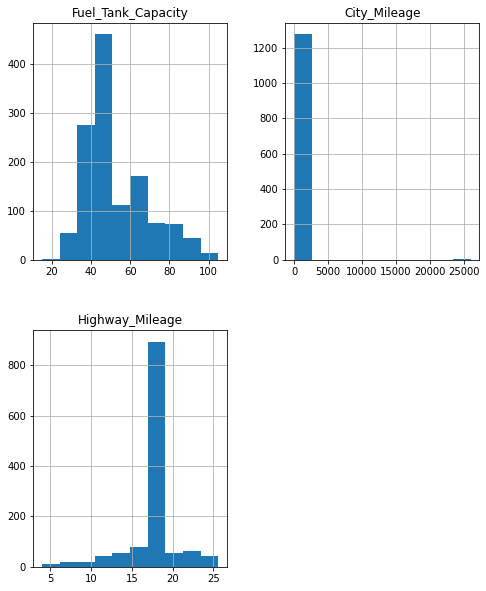

In [35]:
# df.Fuel_Tank_Capacity.isnull().sum()
df2.hist(column=["Fuel_Tank_Capacity","City_Mileage","Highway_Mileage"],figsize=(8,10))
# print(df['Fuel_Tank_Capacity'].mode())


In [39]:
df2[ 'Boot_Space'] =df2[ 'Boot_Space'].apply(lambda x: str(x).replace('litres', '') if 'litres' in str(x) else str(x))
df2[ 'Boot_Space']=pd.to_numeric(df2[ 'Boot_Space'], errors='coerce')
df2.Boot_Space=df2['Boot_Space'].transform(impute_median)

C:\Users\Nisarga\AppData\Local\Temp/ipykernel_34856/2130437840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[ 'Boot_Space'] =df2[ 'Boot_Space'].apply(lambda x: str(x).replace('litres', '') if 'litres' in str(x) else str(x))
C:\Users\Nisarga\AppData\Local\Temp/ipykernel_34856/2130437840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[ 'Boot_Space']=pd.to_numeric(df2[ 'Boot_Space'], errors='coerce')
C:\Users\Nisarga\AppData\Local\Temp/ipykernel_34856/2130437840.py:3: SettingWithCopyWarning: 

In [ ]:
#modes of categorical data
#modes can be bimodal also---be carefull...here all are unimodal
# print(df['Make'].mode())
# print(df['Variant'].mode())
# print(df['Drivetrain'].mode())

In [ ]:
#fill the missing categorical values with mode
#typecasting the mode value to string cuz this method is done only on numerical data---so we r typecasting to string so np
#----if bimodal choose first modal value---
# df['Make'].fillna(str(df['Make'].mode().values[0]),inplace=True)
# df['Variant'].fillna(str(df['Variant'].mode().values[0]),inplace=True)
# df['Drivetrain'].fillna(str(df['Drivetrain'].mode().values[0]),inplace=True)

In [ ]:
#define a function impute_no
def impute_no(series):
    return series.fillna("No")

In [ ]:
df.describe()
#summary stats after cleaning

In [40]:
#count the number of null values in each column
df2.isnull().sum()

Make                       75
Model                       0
Variant                     0
Sales                       0
Ex_Showroom_Price           0
Cylinders                   0
Valves_Per_Cylinder         0
Drivetrain                  7
Engine_Location            43
Fuel_Tank_Capacity          0
Fuel_Type                   0
Body_Type                   6
Doors                       0
City_Mileage                0
Highway_Mileage             0
ARAI_Certified_Mileage    114
Kerb_Weight                 0
Gears                       0
Power_Steering             57
Power_Seats               893
Keyless_Entry             274
Power                       0
Torque                      2
Seating_Capacity            6
Type                        1
12v_Power_Outlet          154
Boot_Space                  0
Number_of_Airbags         135
Car                         0
dtype: int64

## data visualisation

c:\Users\Nisarga\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


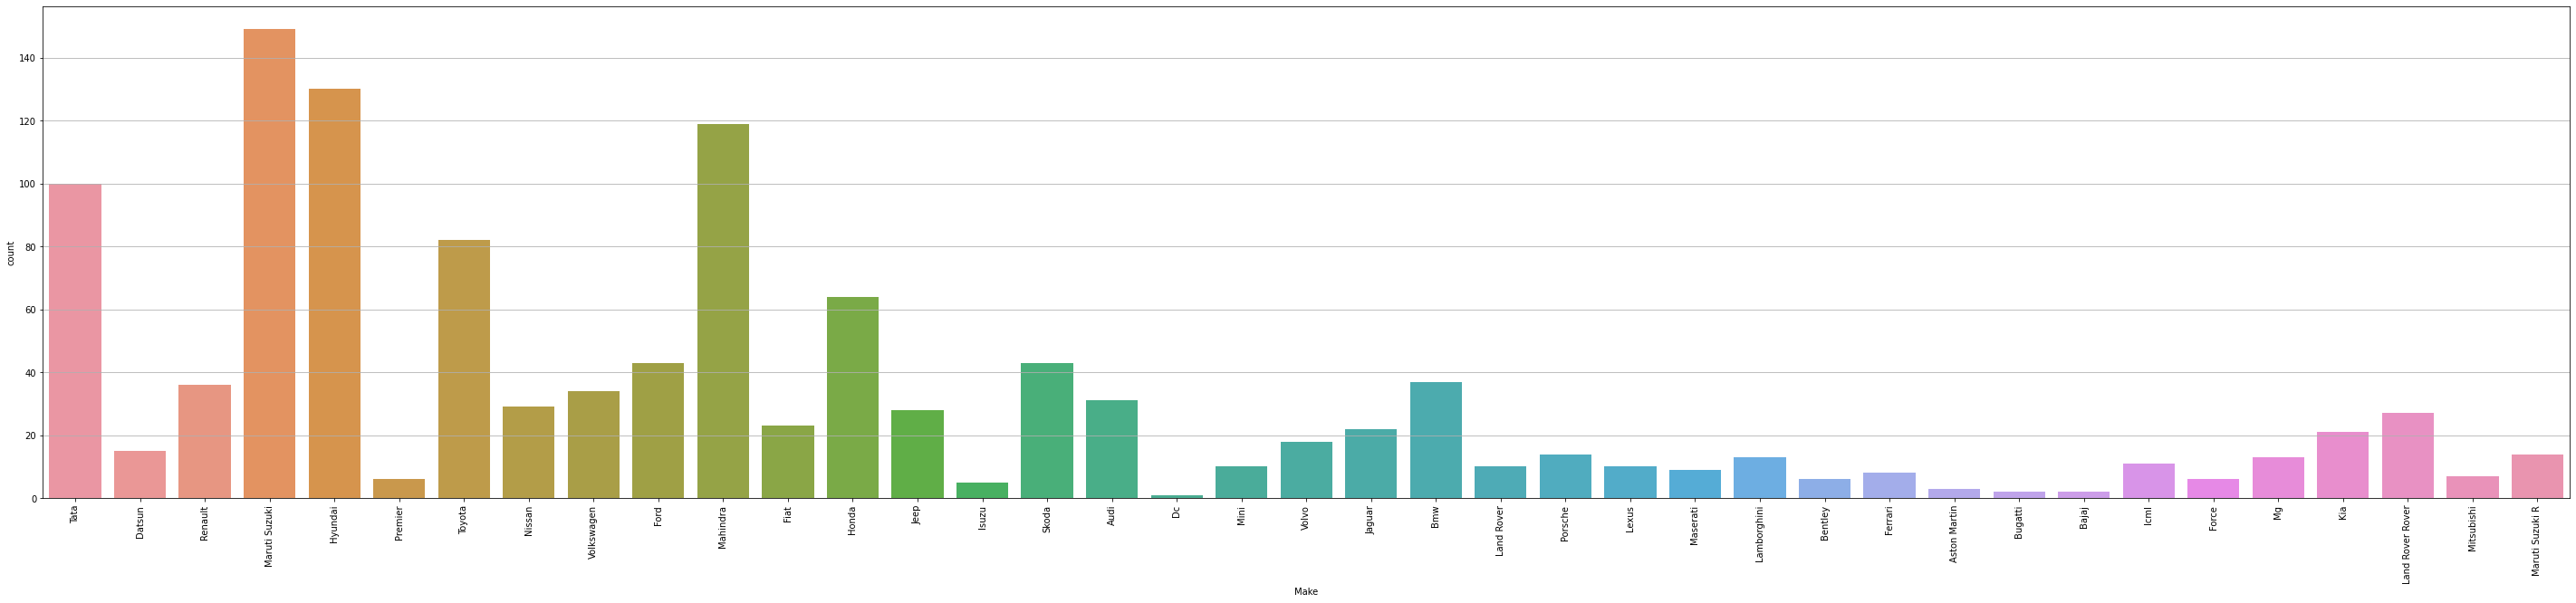

c:\Users\Nisarga\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


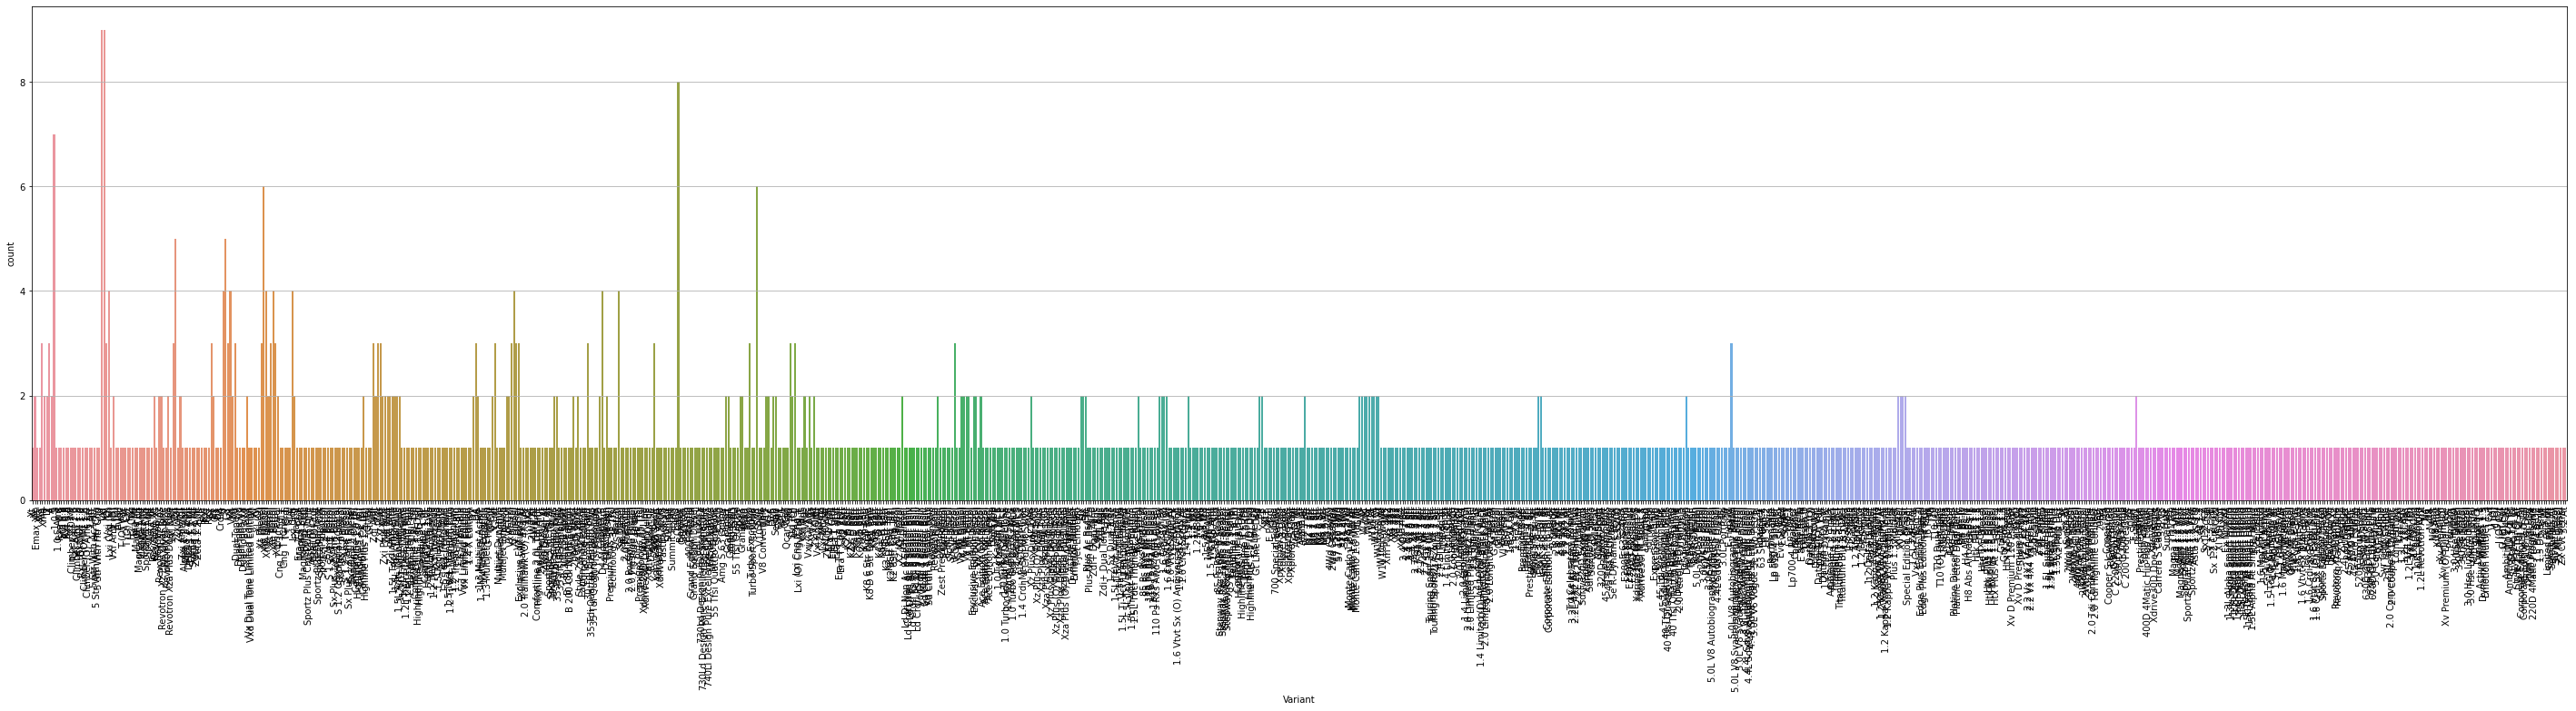

c:\Users\Nisarga\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


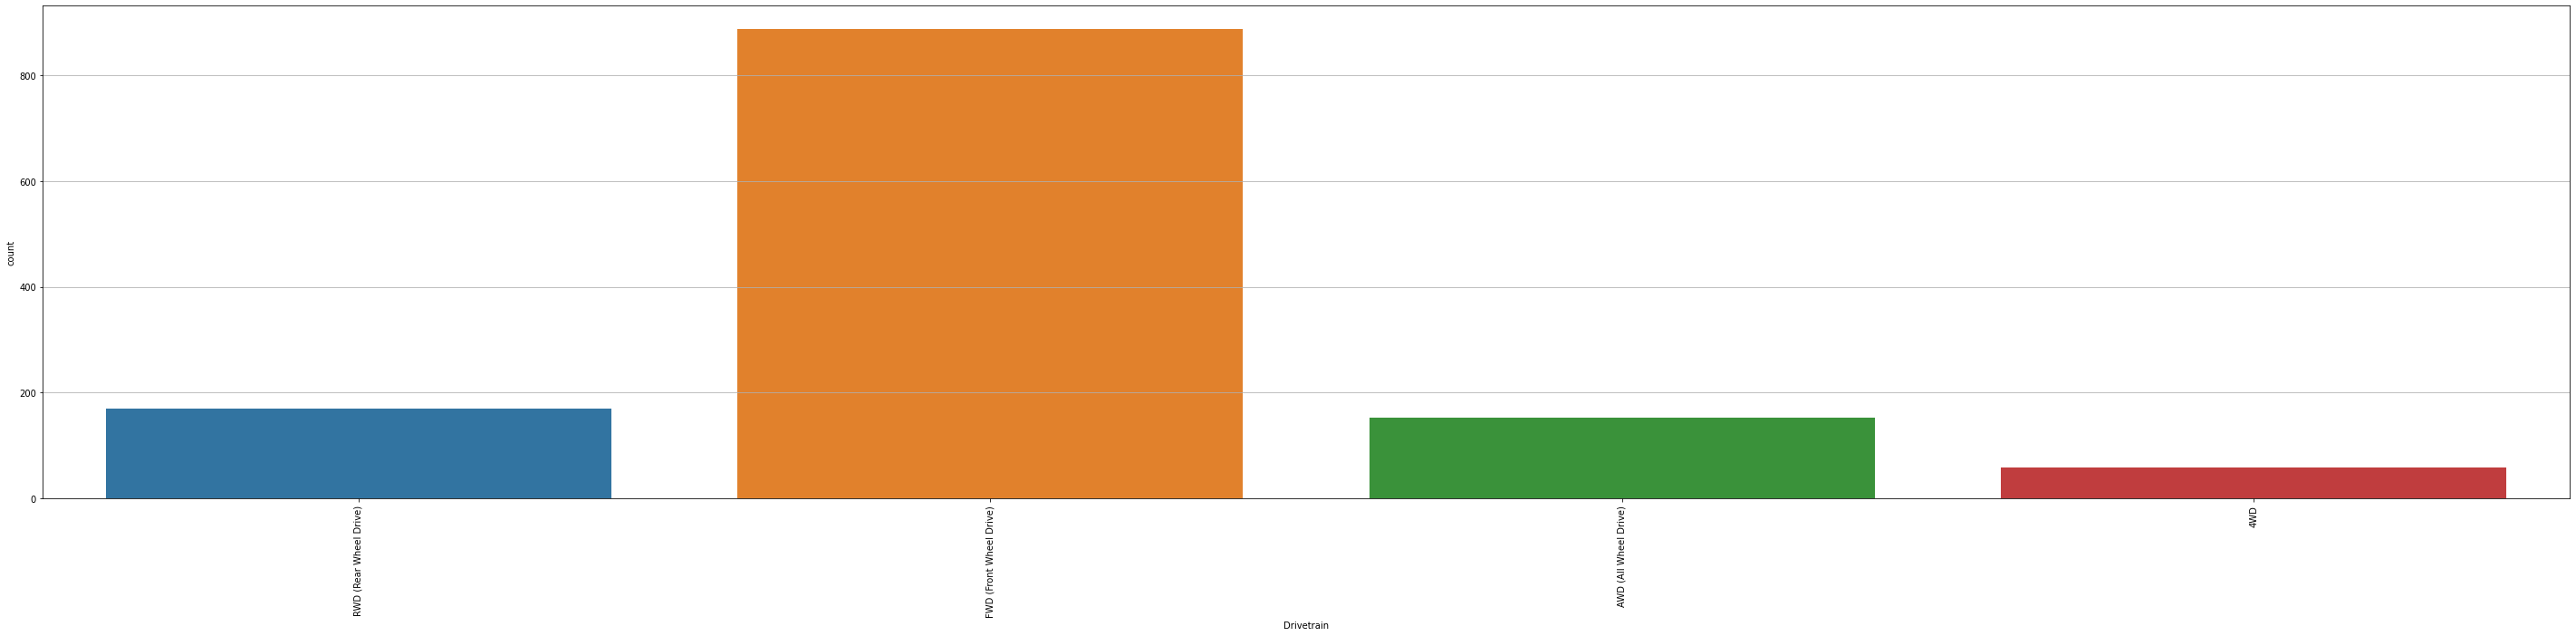

c:\Users\Nisarga\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


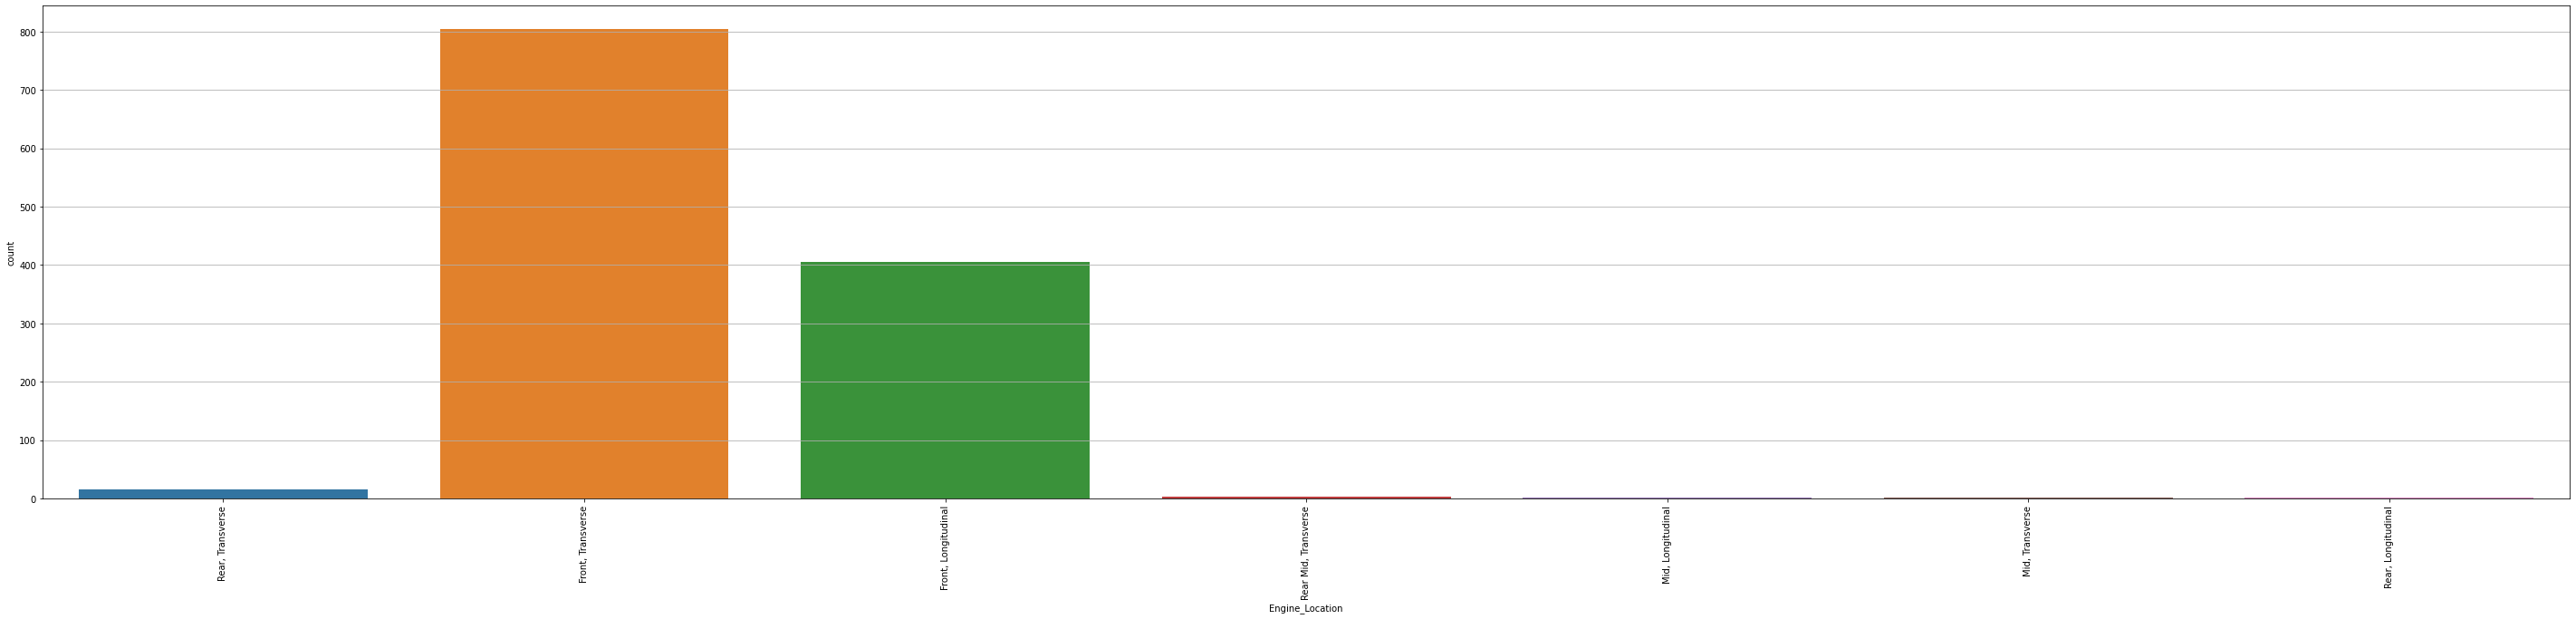

c:\Users\Nisarga\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


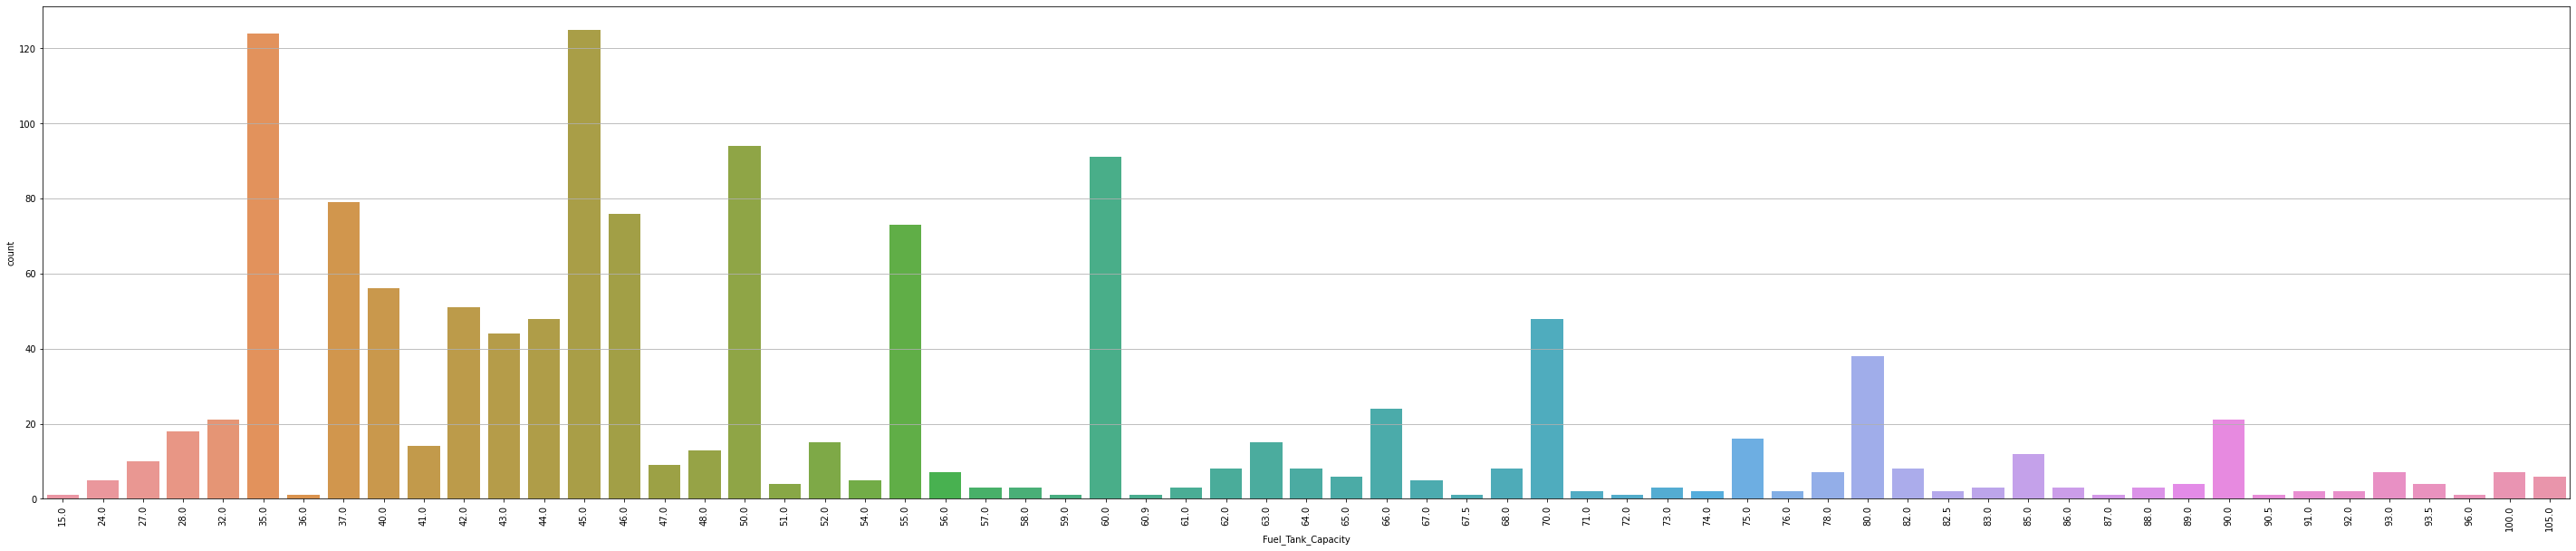

c:\Users\Nisarga\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


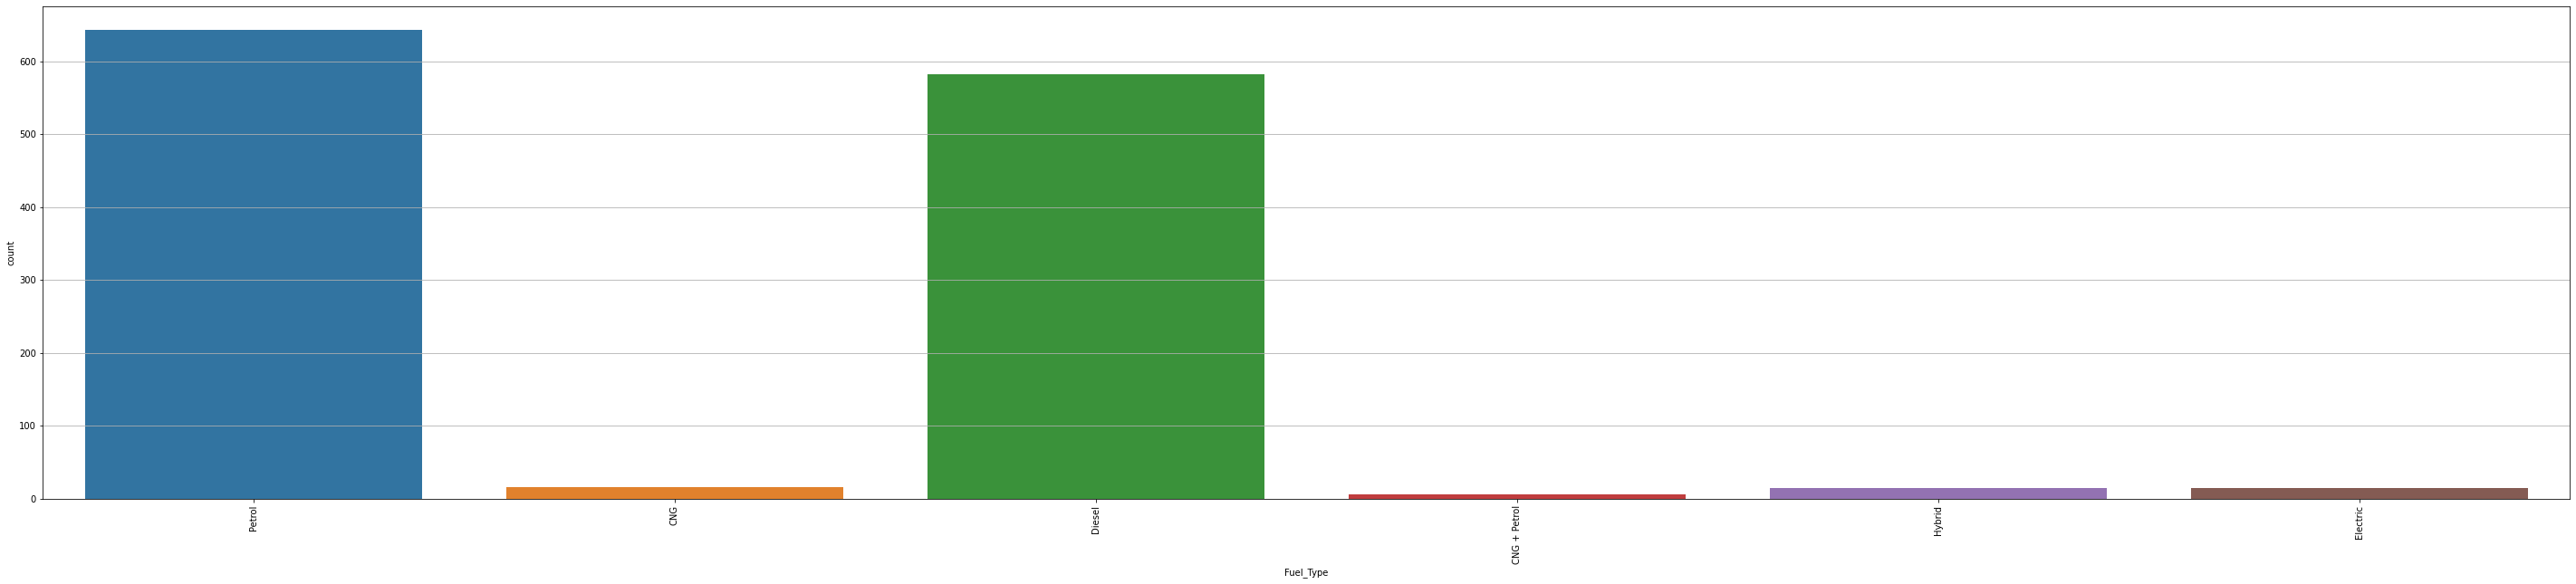

c:\Users\Nisarga\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


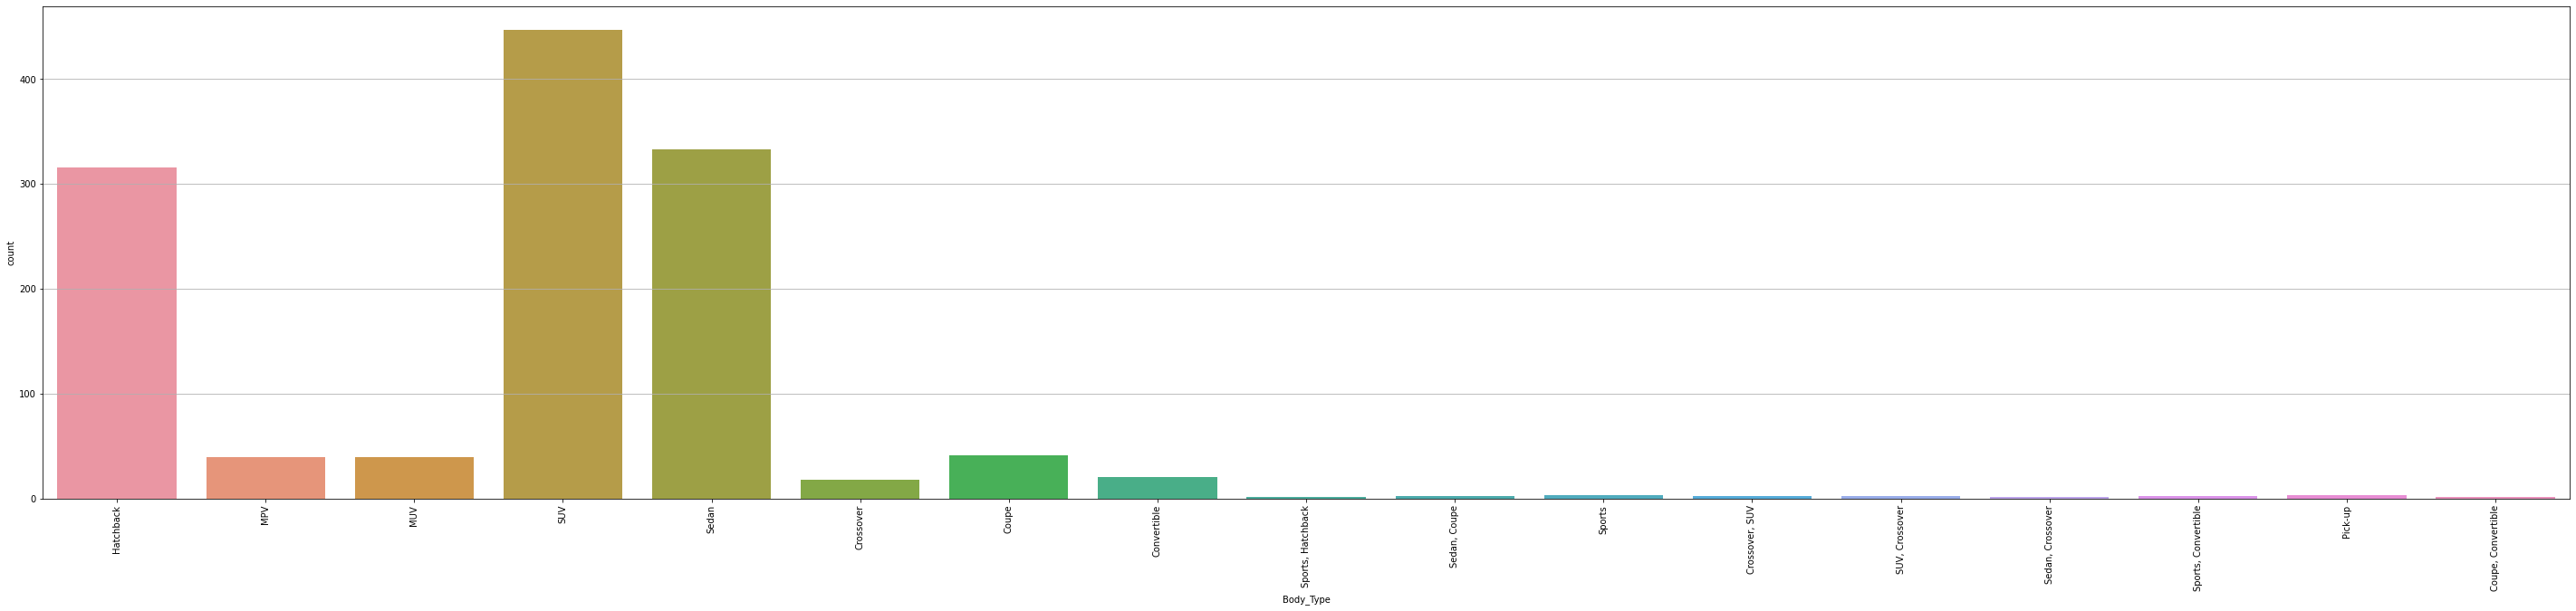

c:\Users\Nisarga\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


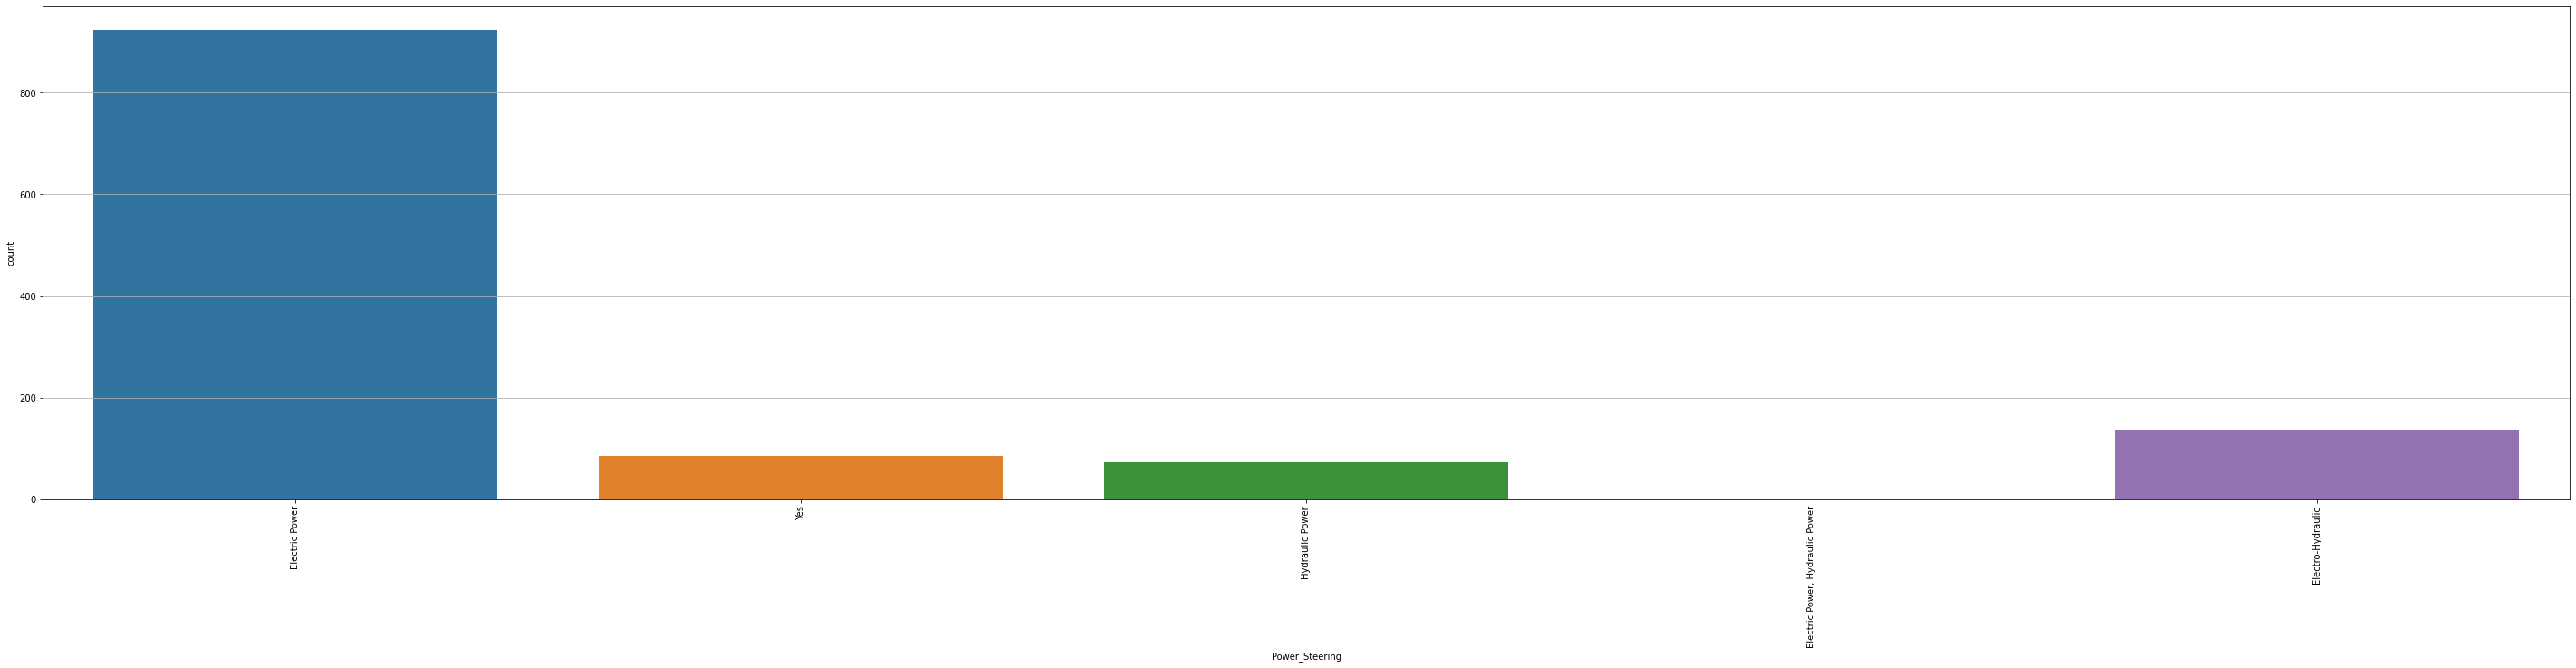

c:\Users\Nisarga\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


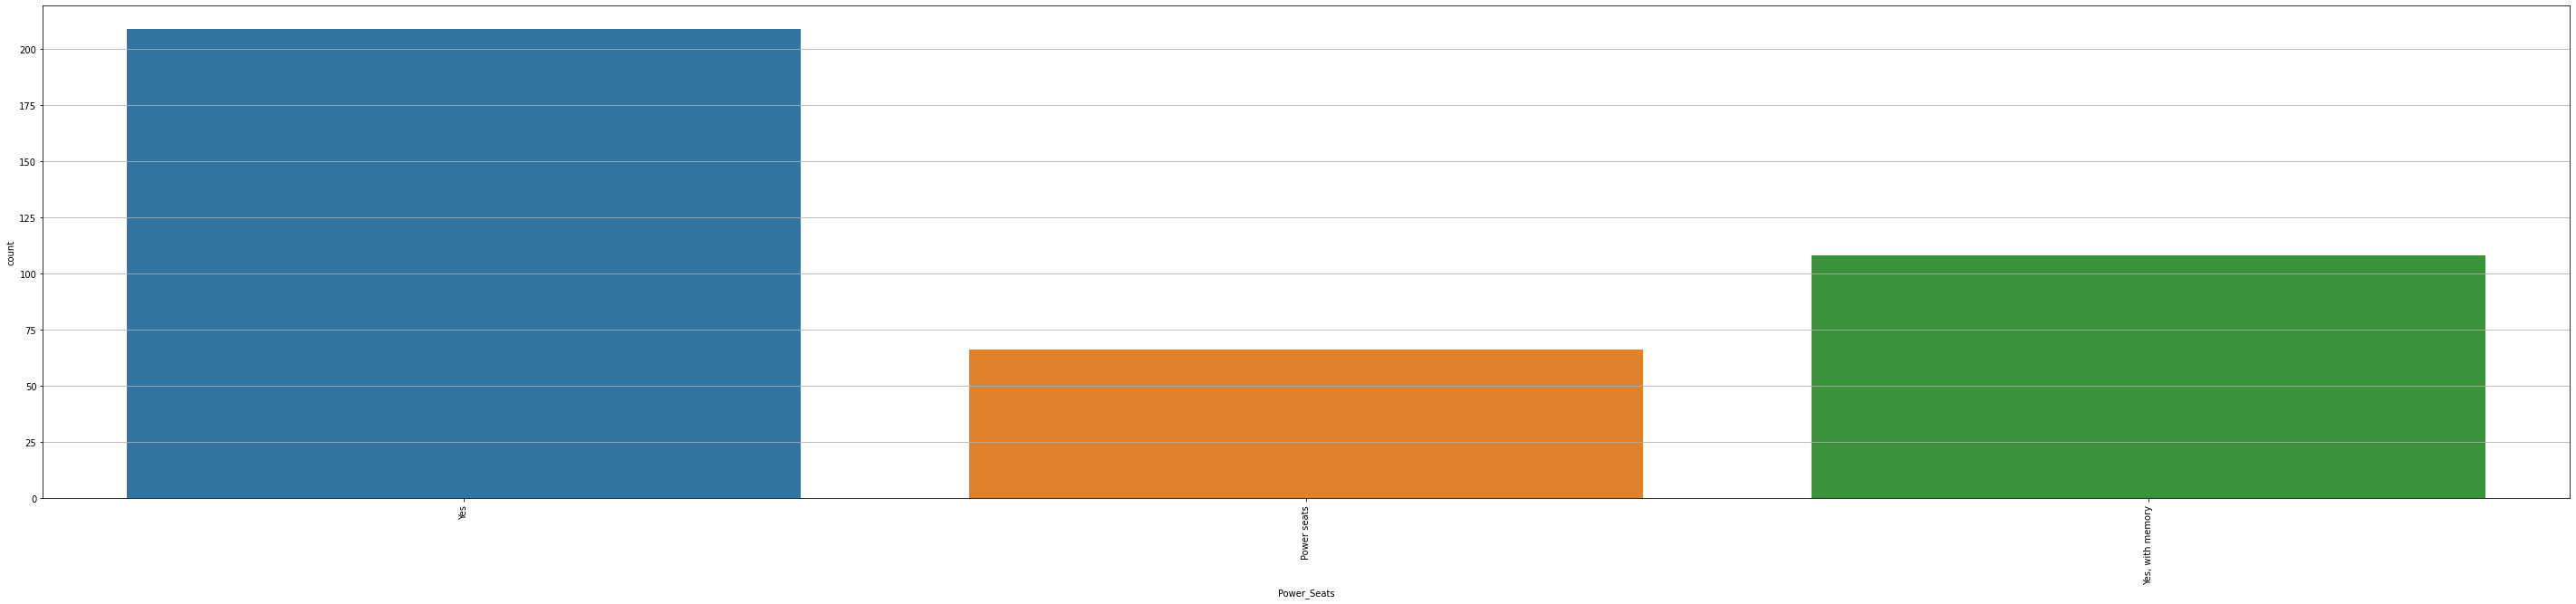

c:\Users\Nisarga\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


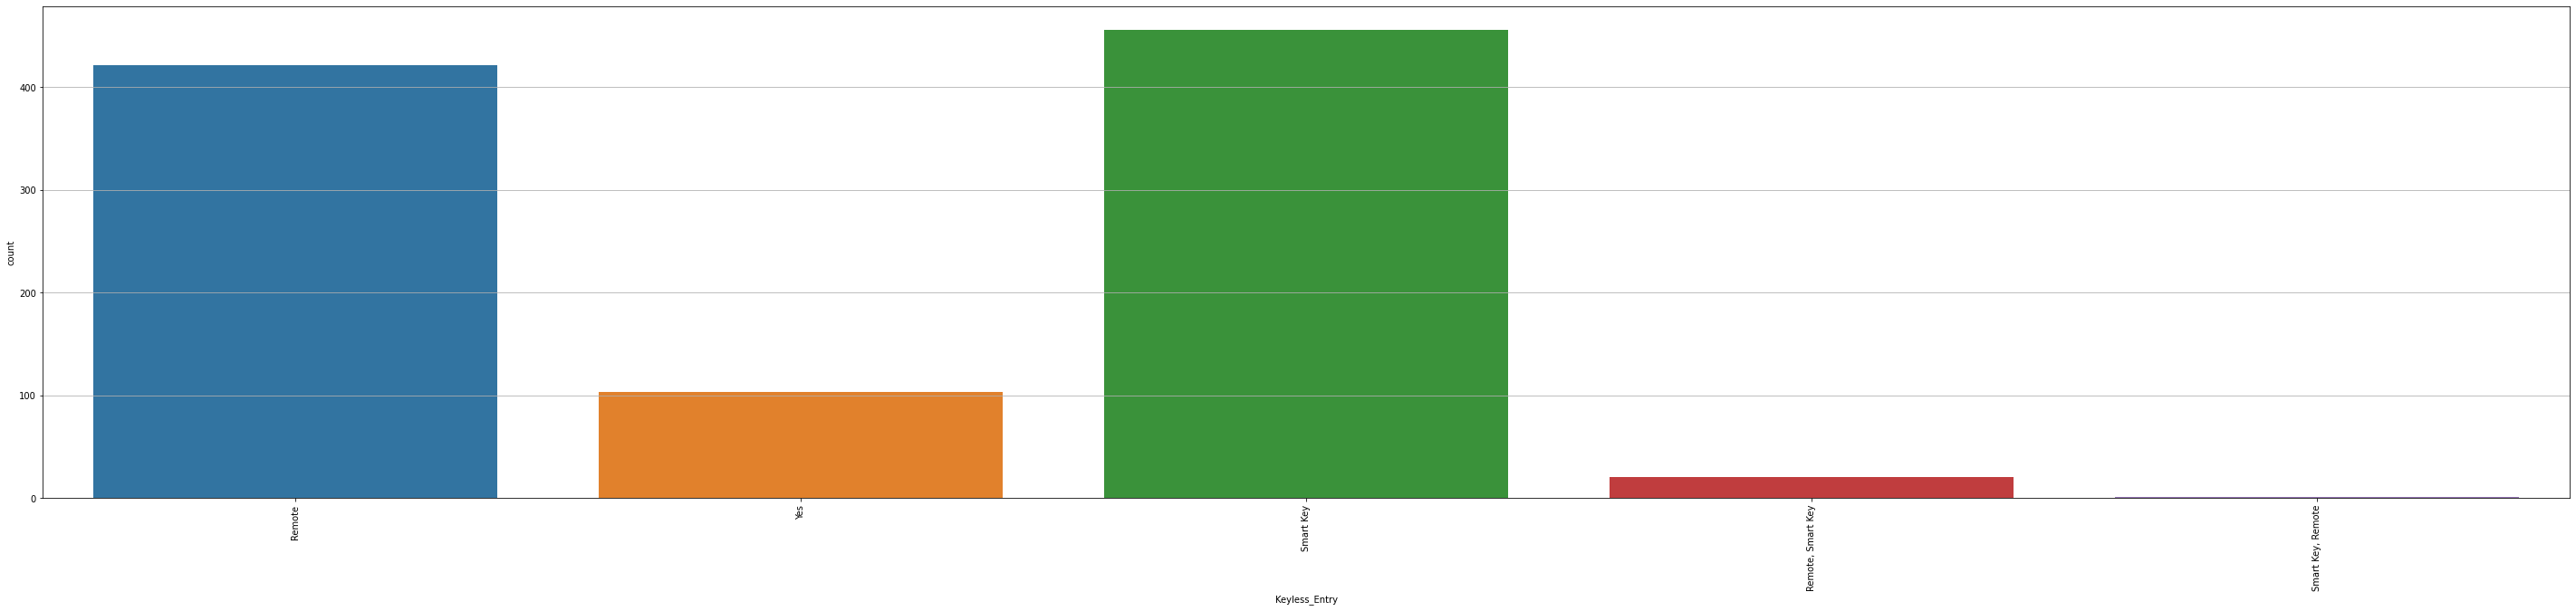

c:\Users\Nisarga\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


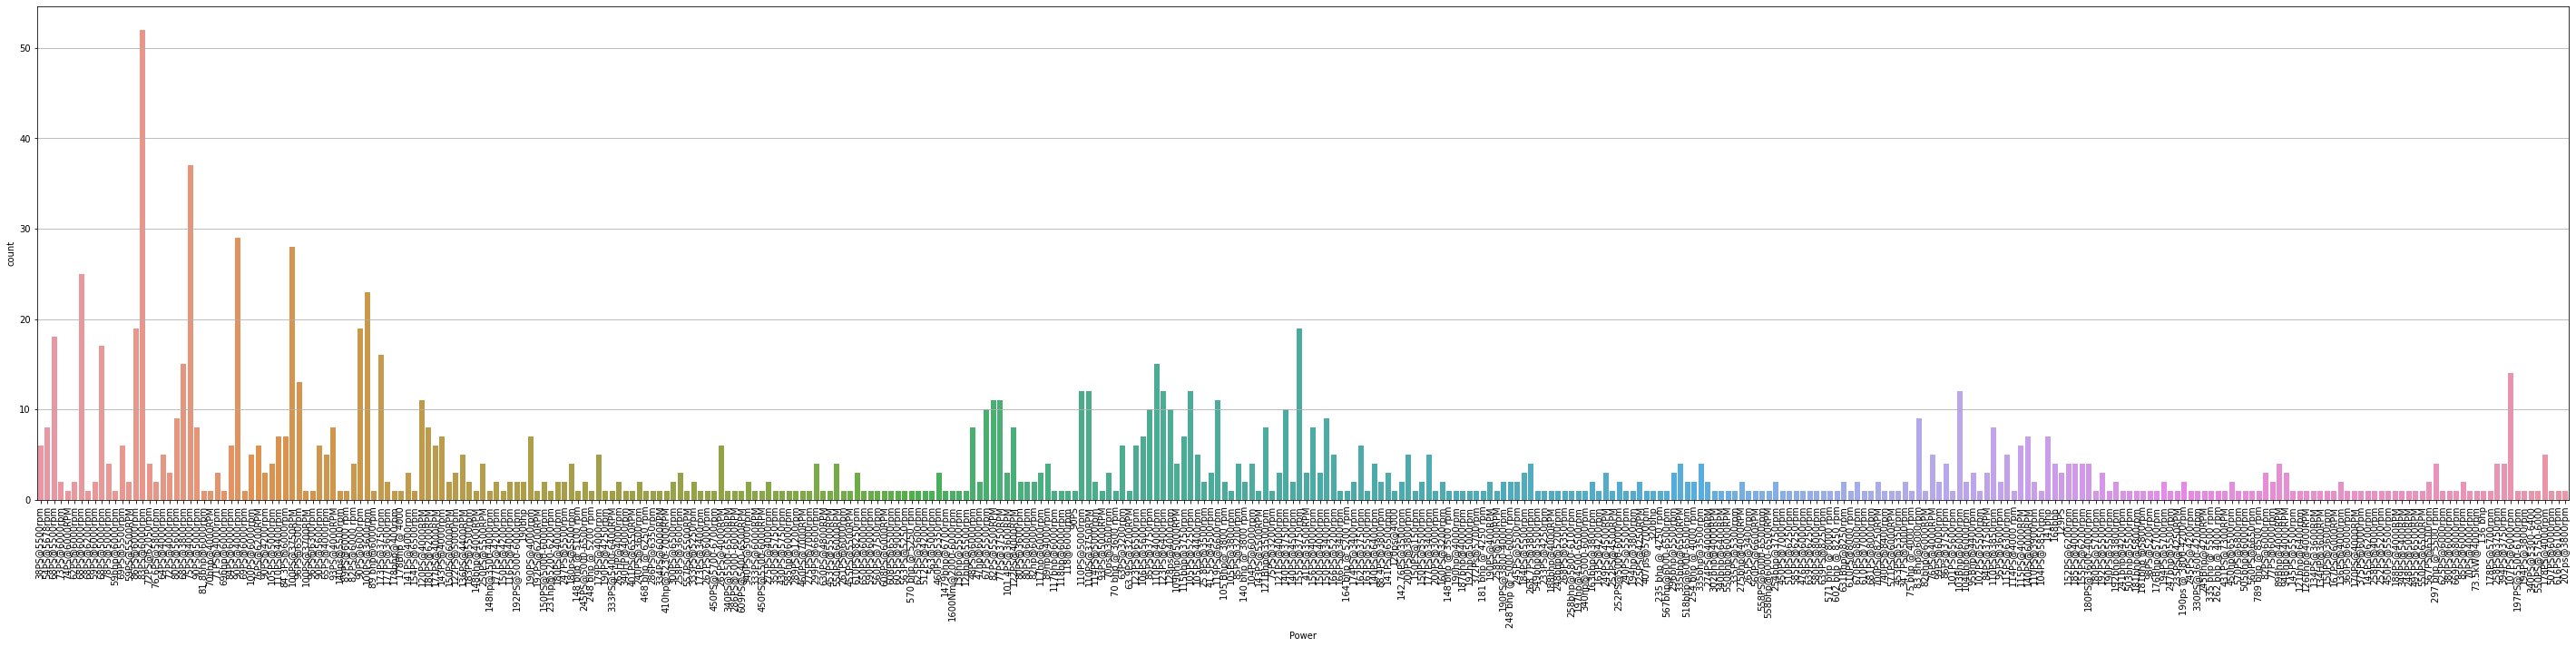

c:\Users\Nisarga\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


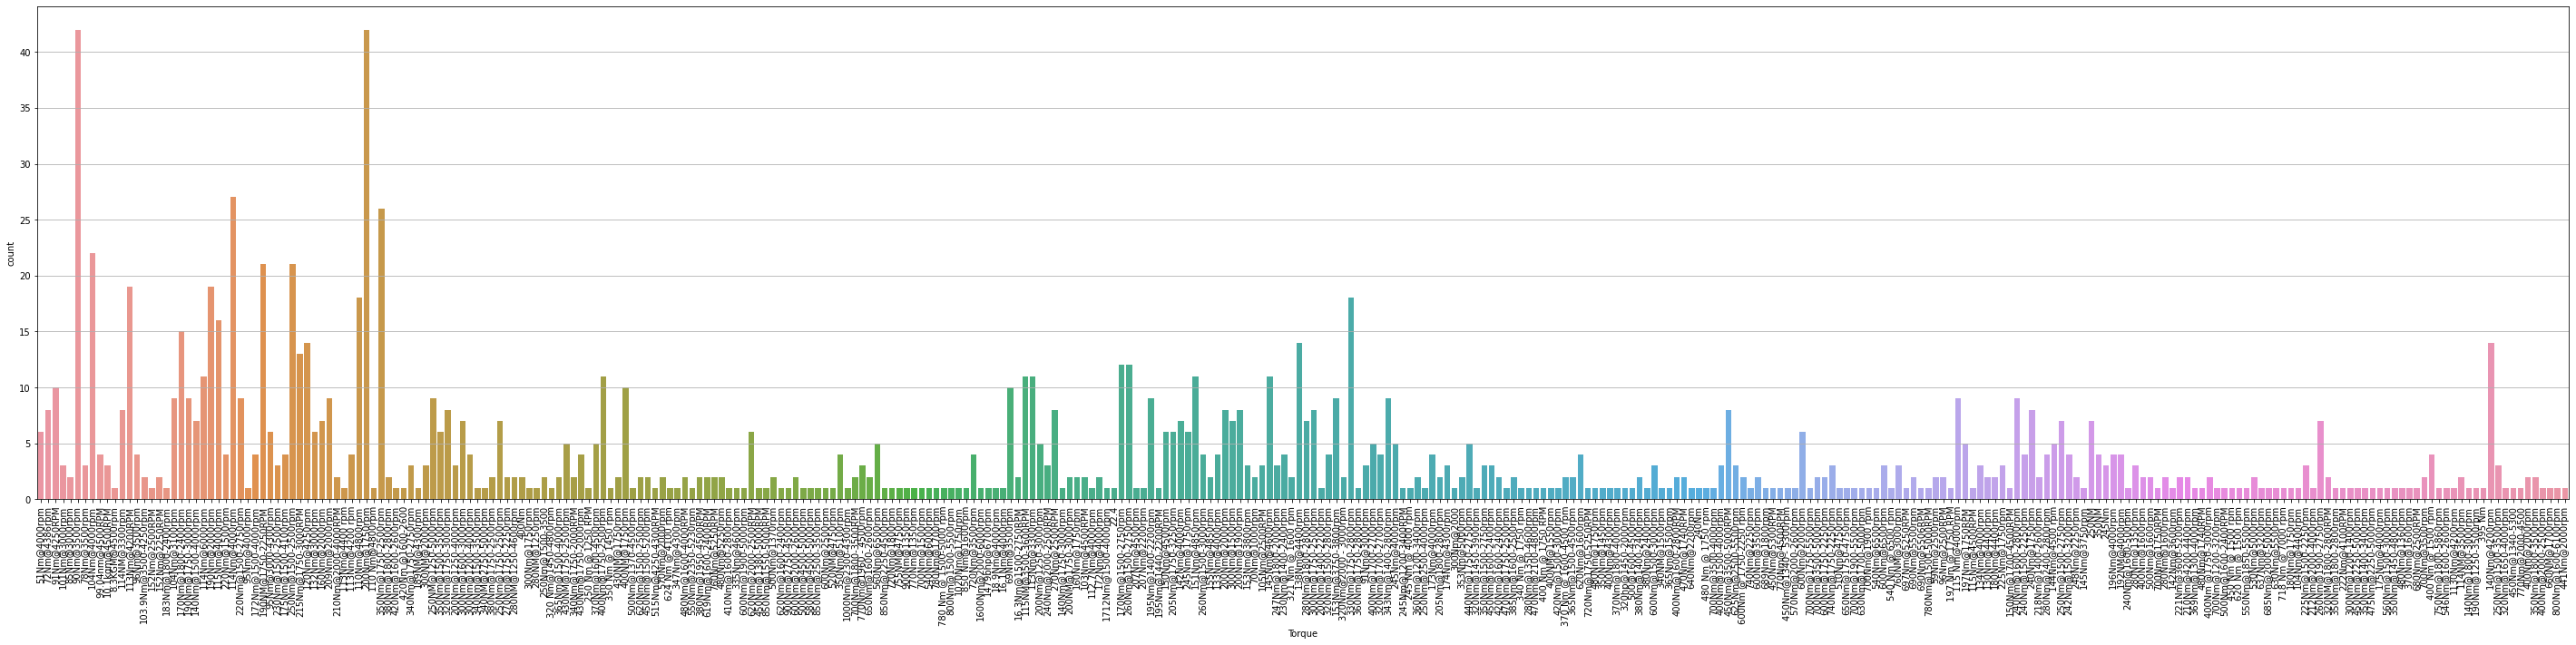

c:\Users\Nisarga\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


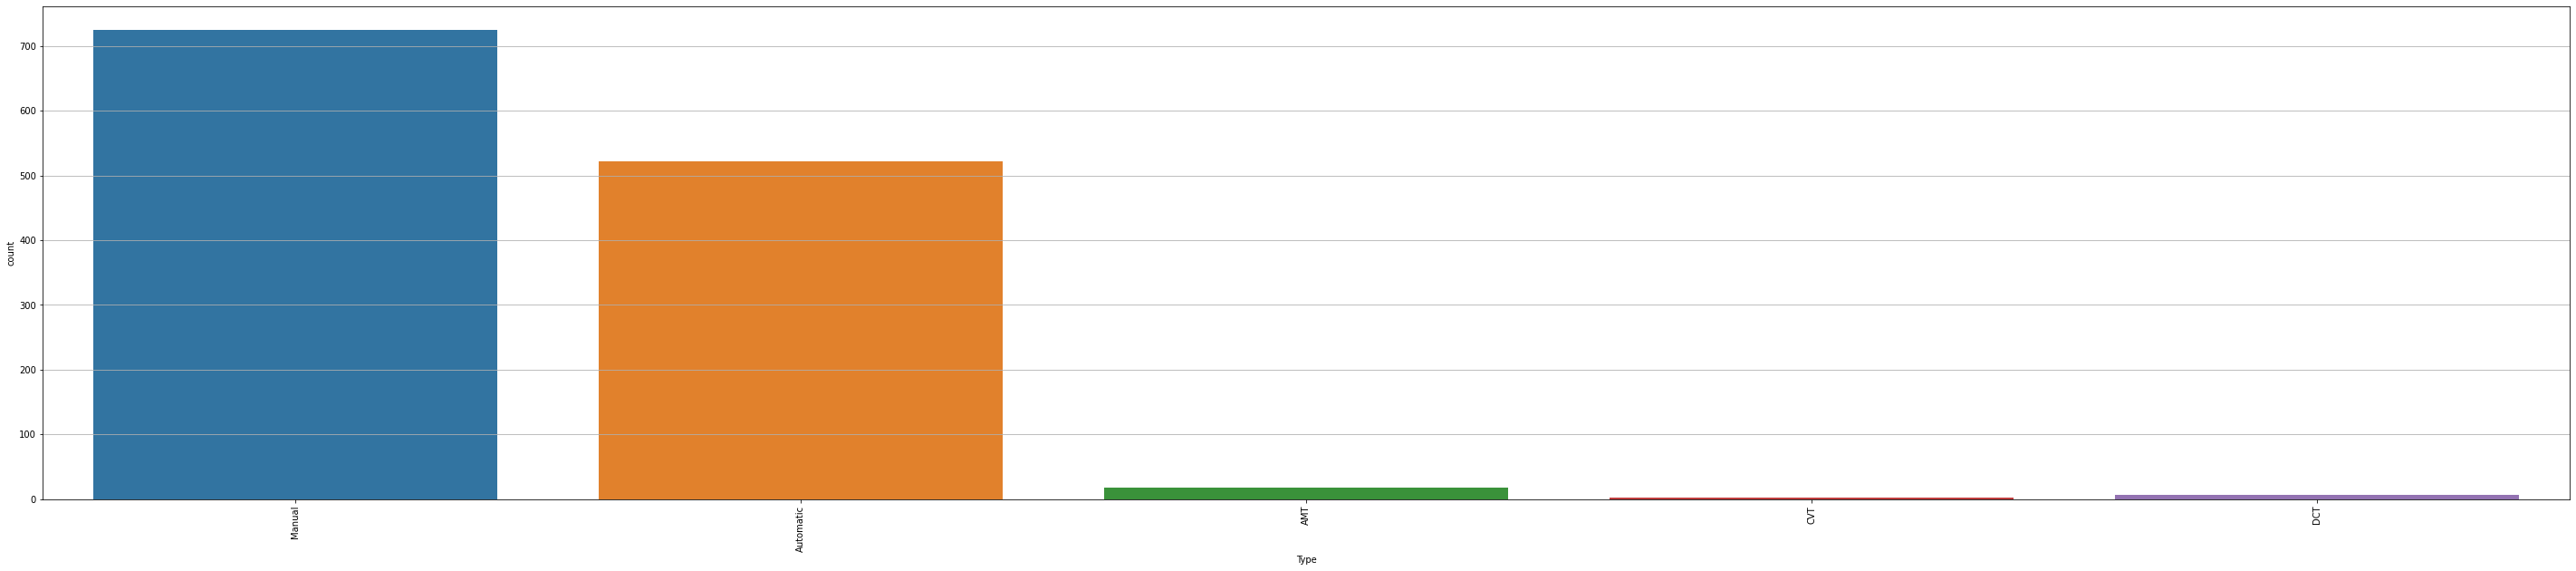

c:\Users\Nisarga\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


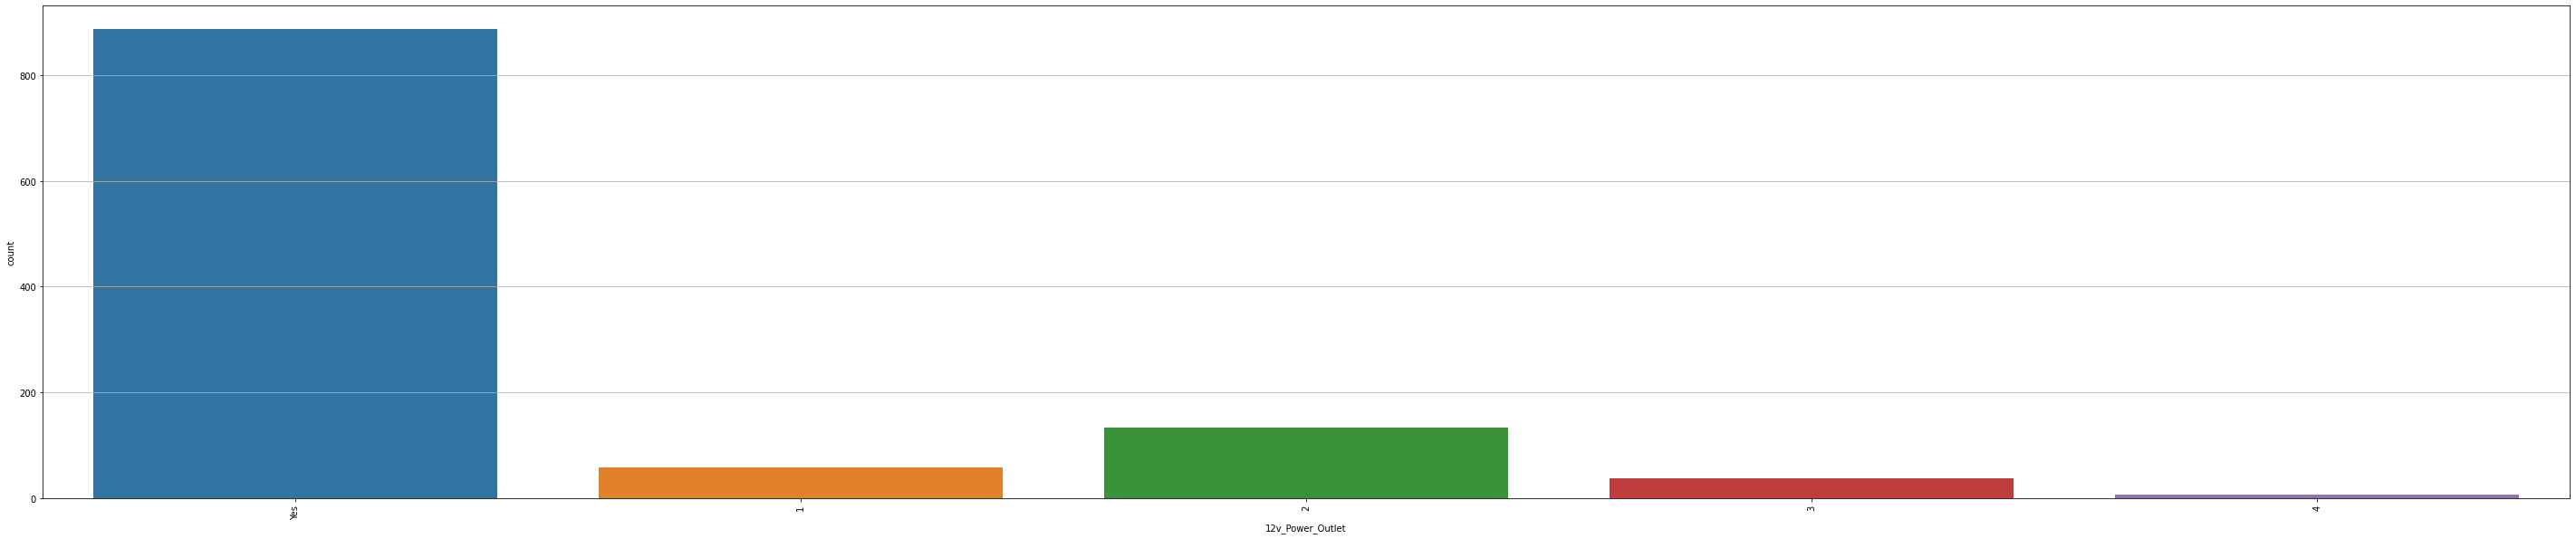

c:\Users\Nisarga\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


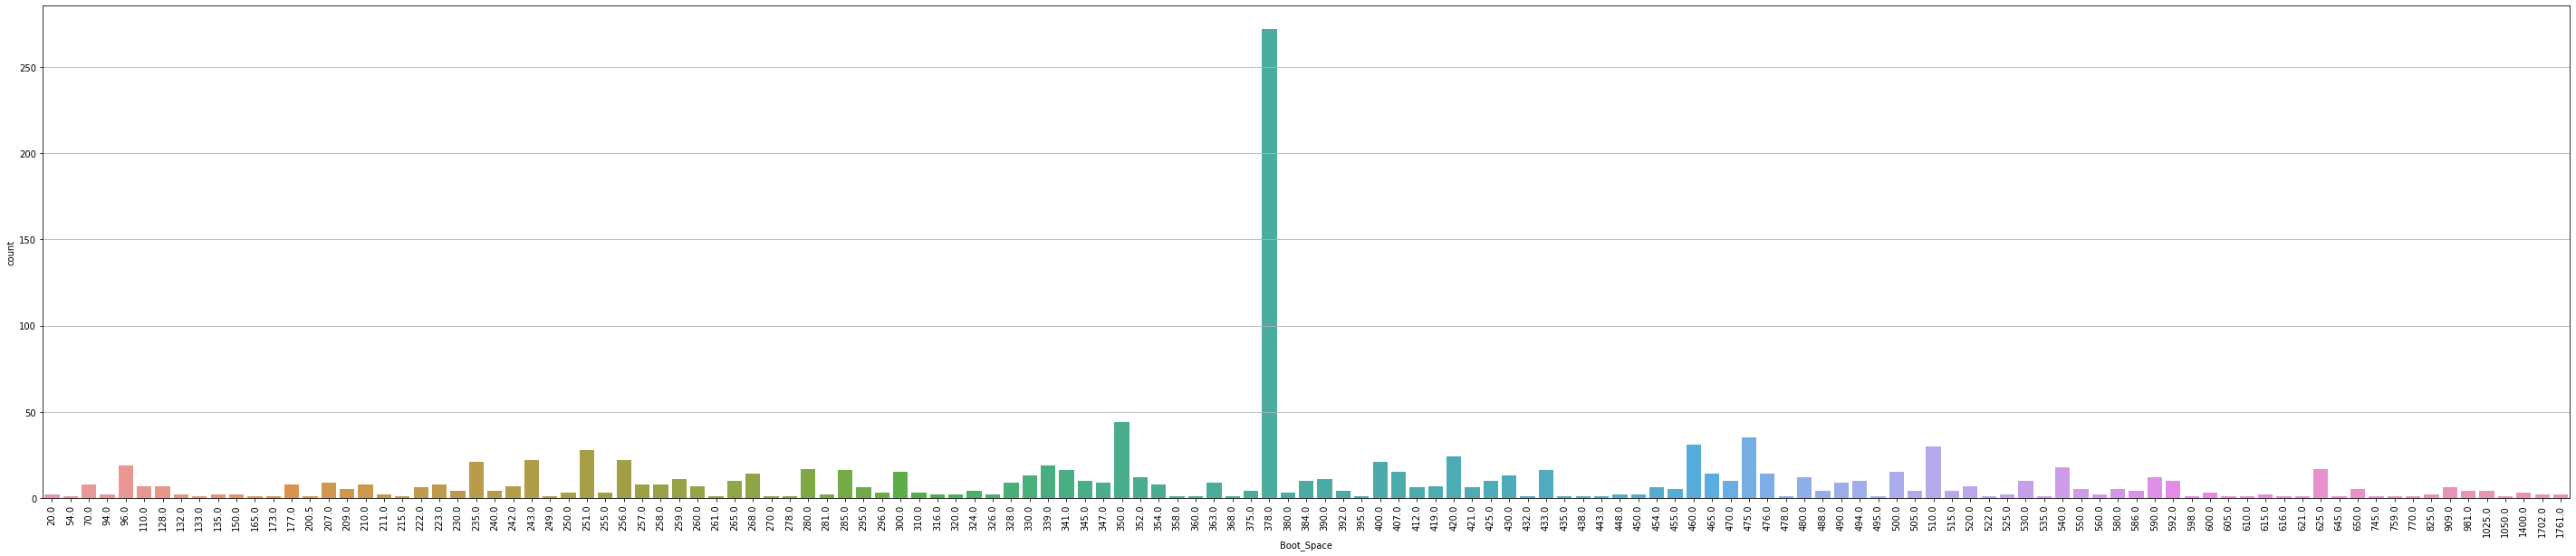

In [41]:
for i in categorical_columns:      
    plt.figure(figsize=(50,10))
    sns.countplot(df2[i])
    plt.xticks(rotation=90)
    plt.grid(axis='y')
    plt.show()

# DJango rendering

In [ ]:
count_of_make=(df[['Make','Model']].groupby("Make").apply(len))
count_of_model=(df2[['Make','Variant']].groupby("Make").apply(len))
Sales=(df2[['Sales','Make']].groupby("Sales").apply(len))

In [ ]:
count_of_model=count_of_make.unique().tolist() #rendered to the django
make=count_of_make.index.tolist()
count_of_make.unique().sum()


In [ ]:
count_of_make.reset_index("Make","count_by_make")

In [ ]:
count_of_model

In [ ]:
df.Drivetrain.value_counts()

In [ ]:
df.Type.value_counts()

In [ ]:
df.Power_Steering.value_counts().sum()

In [ ]:
df.Fuel_Type.value_counts()

In [ ]:
df.Sales.sum()

In [ ]:
4596537.887147335/77.69

In [ ]:
df.Ex_Showroom_Price.mean()

In [27]:
df.Kerb_Weight.value_counts

<bound method IndexOpsMixin.value_counts of 0        660 kg
1        725 kg
2        710 kg
3        725 kg
4        725 kg
         ...   
1271    1170 kg
1272    1175 kg
1273    1107 kg
1274    1080 kg
1275    2335 kg
Name: Kerb_Weight, Length: 1276, dtype: object>

In [44]:
df2.Engine_Location.value_counts()

Front, Transverse       804
Front, Longitudinal     405
Rear, Transverse         16
Rear Mid, Transverse      3
Mid, Longitudinal         2
Mid, Transverse           2
Rear, Longitudinal        1
Name: Engine_Location, dtype: int64

In [46]:
df2['12v_Power_Outlet'].value_counts()

Yes    887
2      133
1       58
3       38
4        6
Name: 12v_Power_Outlet, dtype: int64

In [52]:
df2.Fuel_Tank_Capacity.value_counts()

45.0    125
35.0    124
50.0     94
60.0     91
37.0     79
       ... 
36.0      1
90.5      1
87.0      1
72.0      1
96.0      1
Name: Fuel_Tank_Capacity, Length: 63, dtype: int64

In [58]:
df2.Fuel_Tank_Capacity.unique().mean()

63.95079365079365

In [59]:
df2.Fuel_Tank_Capacity.unique().max()

105.0

In [60]:
df2.Fuel_Tank_Capacity.unique().min()

15.0

In [61]:
df2.Power_Seats.value_counts()

Yes                 209
Yes, with memory    108
Power seats          66
Name: Power_Seats, dtype: int64

In [62]:
df2.Boot_Space.mean()

386.907131661442

In [63]:
df.Body_Type.value_counts()

SUV                    447
Sedan                  333
Hatchback              316
Coupe                   41
MUV                     39
MPV                     39
Convertible             20
Crossover               18
Sports                   3
Pick-up                  3
Sports, Convertible      2
Sedan, Coupe             2
Crossover, SUV           2
SUV, Crossover           2
Sports, Hatchback        1
Sedan, Crossover         1
Coupe, Convertible       1
Name: Body_Type, dtype: int64

In [71]:
df.City_Mileage.unique().tolist()

['?23.6 km/litre',
 nan,
 '21.38 km/litre',
 '25.17 km/litre',
 '12 km/litre',
 '11 km/litre',
 '14 km/litre',
 '19 km/litre',
 '20.6 km/litre',
 '23 km/litre',
 '23.84 km/litre',
 '20.89 km/litre',
 '15.1 km/litre',
 '13 km/litre',
 '20 km/litre',
 '20.3 km/litre',
 '19.49 km/litre',
 '22,95 km/litre',
 '17,57 km/litre',
 '14.6 km/litre',
 '16.3 km/litre',
 '13.3 km/litre',
 '18.4 km/litre',
 '17 km/litre',
 '28,4 km/litre',
 '28.4 km/litre',
 '15.3 km/litre',
 '13,6 km/litre',
 '20.32 km/litre',
 '13.6 km/litre',
 '15 km/litre',
 '16,78 km/litre',
 '18.1 km/litre',
 '16.78 km/litre',
 '18 km/litre',
 '11.2 km/litre',
 '11.3 km/litre',
 '13.8 km/litre',
 '12.4 km/litre',
 '9.5 km/litre',
 '11.5 km/litre',
 '11.04 km/litre',
 '13.9 km/litre',
 '8 km/litre',
 '10.3 km/litre',
 '12.3 km/litre',
 '5.7 km/litre',
 '19.2 km/litre',
 '16 km/litre',
 '11,44 km/litre',
 '10 km/litre',
 '12.8 km/litre',
 '4.5 km/litre',
 '12.5-12.7 km/litre',
 '9 km/litre',
 '6.5 km/litre',
 '7 km/litre',
 '18.

In [73]:
df2.ARAI_Certified_Mileage.value_counts().tolist()

[27,
 24,
 24,
 23,
 20,
 19,
 18,
 17,
 15,
 14,
 14,
 14,
 13,
 13,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 

In [74]:
df2.Highway_Mileage.value_counts().tolist()

[814,
 17,
 16,
 13,
 11,
 11,
 11,
 11,
 11,
 10,
 9,
 9,
 8,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]